<div style="text-align: center;">

# MSIN0143 Coursework – Group 1 Team 6  
## Exploratory Analysis of Apple Stock Prices Using Kaggle Data, with a Comparison of Three Machine Learning Models

</div>



### Team Members 

 **Vedant Bhatia**   
 **Vidhi Laddha**   
 **Vincent Ni**   
 **Jack Peng**  
 **Tianqi Zhou**  


### Word Count: 1921

# Table of Contents

1. [Introduction](#1.-Introduction)

2. [Data Preparation](#2.-Data-Preparation)  
   - [2.1 Data Loading](#2.1-Data-Loading)  
   - [2.2 Initial Exploration](#2.2-Initial-Exploration)  
   - [2.3 Data Cleaning](#2.3-Data-Cleaning)  

3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)  
   - [3.1 Summary Statistics](#3.1-Summary-Statistics)  
   - [3.2 Correlation Heatmap of Key Variables](#3.2-Correlation-Heatmap-of-Key-Variables)  
   - [3.3 Evolution of Apple’s Adjusted Close Price](#3.3-Evolution-of-Apple’s-Adjusted-Close-Price)  
   - [3.4 Monthly Distribution of Adjusted Closing Prices](#3.4-Monthly-Distribution-of-Adjusted-Closing-Prices)  
   - [3.5 Moving Average Trend Analysis (2017–2018)](#3.5-Moving-Average-Trend-Analysis-2017–2018)  

4. [ARIMA Model](#4.-ARIMA-Model)  
   - [4.1 Rationale for Using ARIMA](#4.1-Rationale-for-Using-ARIMA)  
   - [4.2 Stationarity and the ADF Test](#4.2-Stationarity-and-the-ADF-Test)  
   - [4.3 Training Set Selection and Initial Preparation](#4.3-Training-Set-Selection-and-Initial-Preparation)  
   - [4.4 ARIMA Model Fitting](#4.4-ARIMA-Model-Fitting)  
   - [4.5 ARIMA Forecast Evaluation](#4.5-ARIMA-Forecast-Evaluation)  
   - [4.6 ARIMA Error Metrics](#4.6-ARIMA-Error-Metrics)  

5. [Random Forest Model](#5.-Random-Forest-Model)  
   - [5.1 Rationale for Using the Random Forest Model](#5.1-Rationale-for-Using-the-Random-Forest-Model)  
   - [5.2 Feature Engineering and Target Construction](#5.2-Feature-Engineering-and-Target-Construction)  
   - [5.3 Random Forest Model Fitting](#5.3-Random-Forest-Model-Fitting)  
   - [5.4 Random Forest Forecast Evaluation](#5.4-Random-Forest-Forecast-Evaluation)  

6. [LSTM Model](#6.-LSTM-Model)  
   - [6.1 Rationale for Using the LSTM Model](#6.1-Rationale-for-Using-the-LSTM-Model)  
   - [6.2 Data Preprocessing](#6.2-Data-Preprocessing)  
   - [6.3 Architecture of the LSTM Model](#6.3-Architecture-of-the-LSTM-Model)  
   - [6.4 Compilation and Training of the LSTM Model](#6.4-Compilation-and-Training-of-the-LSTM-Model)  
   - [6.5 Visualising Losses over Epochs](#6.5-Visualising-Losses-over-Epochs)  
   - [6.6 Model Prediction and Reverse Scaling](#6.6-Model-Prediction-and-Reverse-Scaling)  
   - [6.7 Visualising the Results](#6.7-Visualising-the-Results)  
   - [6.8 Evaluation Metrics](#6.8-Evaluation-Metrics)  

7. [Model Comparison and Summary](#7.-Model-Comparison-and-Summary)  
   - [7.1 Performance Comparison](#7.1-Performance-Comparison)  
   - [7.2 Limitations](#7.2-Limitations)  
   - [7.3 Summary](#7.3-Summary)  

8. [References](#8.-References)

9. [Appendix](#9.-Appendix)  
   - [9.1 Project Management](#9.1-Project-Management)  
     - [Overview](#Overview)  
     - [Workflow & Communication](#Workflow-&-Communication)  
     - [Quality Assurance & Review](#Quality-Assurance-&-Review)  
     - [Team Roles & Contributions](#Team-Roles-&-Contributions)  
   - [9.2 AI Usage](#9.2-AI-Usage)





## 1. Introduction

This report presents an exploratory data analysis (EDA) of historical Apple Inc. (AAPL) stock prices using a publicly available Kaggle dataset. The aim is to understand how the stock behaves over time by examining trends, volatility, trading volume and relationships between core variables (Open, High, Low, Close, Volume) through summary statistics, time-series plots, moving averages and correlation analysis (Makridakis et al., 2018). Building on these insights, three simple machine-learning models are then implemented to illustrate how EDA can inform basic forecasting choices, with the focus on interpretability rather than complex optimisation (Fischer and Krauss, 2018).


## 2. Data Preparation 

We use a historical Apple Inc. (AAPL) stock price dataset sourced from Kaggle. The data covers daily trading activity from 1980 to 2022, so it reflects past market conditions rather than present prices, making it suitable for analysing long-term trends, volatility, and patterns in Apple’s stock performance.

### 2.1 Data Loading 

In [2]:
%pip install statsmodels 
%pip install pmdarima

  Using cached statsmodels-0.14.5-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
Using cached statsmodels-0.14.5-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.5 MB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.9/688.9 kB 4.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pmdarima]1/2 [pmdarima]
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller # Check if time-series data is stationary Because Arima requires stationary data (ADF test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
for dirname, _, filenames in os.walk('input'): #dataset is located in the input folder 
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/AAPL_stock.csv


Our Kaggle dataset is provided in CSV format, so we can use the `pandas.read_csv()` function to load the dataset and display it in its raw form.

In [4]:
# Set 'Date' as the index so we can access specific rows by date
df = pd.read_csv("input/AAPL_stock.csv",parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


### 2.2 Initial Exploration

According to the acknowledgements on this Kaggle dataset, the data was scraped from Yahoo Finance. 

- `Open`: price at market open (USD)  
- `High`: highest price during the day (USD)  
- `Low`: lowest price during the day (USD)  
- `Close`: price at market close (USD)  
- `Volume`: total shares traded that day



In [5]:
df.info() #showing the data types 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10443 entries, 1980-12-12 to 2022-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10443 non-null  float64
 1   High       10443 non-null  float64
 2   Low        10443 non-null  float64
 3   Close      10443 non-null  float64
 4   Adj Close  10443 non-null  float64
 5   Volume     10443 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 571.1 KB


### 2.3 Data Cleaning

To assess the quality of the dataset, we checked for missing values and duplicate rows.
The results show that there are no null entries and no duplicated observations, so no additional cleaning was required at this stage.


In [6]:
df.isnull().sum() # all features are non-null 
df.duplicated().sum() # check duplicate values

np.int64(0)

## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

The summary statistics help us understand central tendencies (mean, median), variability (standard deviation), and the overall range of values (min and max) for key variables.


In [7]:
#summary statistics
df.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


The high standard deviation (around 31) relative to the mean (around 14) for the Open, High, Low, and Close prices indicates substantial price volatility over the sample period. This suggests it is useful to examine volatility more closely, for example with a rolling standard deviation of returns or a stock price time series plot.

### 3.2 Correlation Heatmap of Key Variables

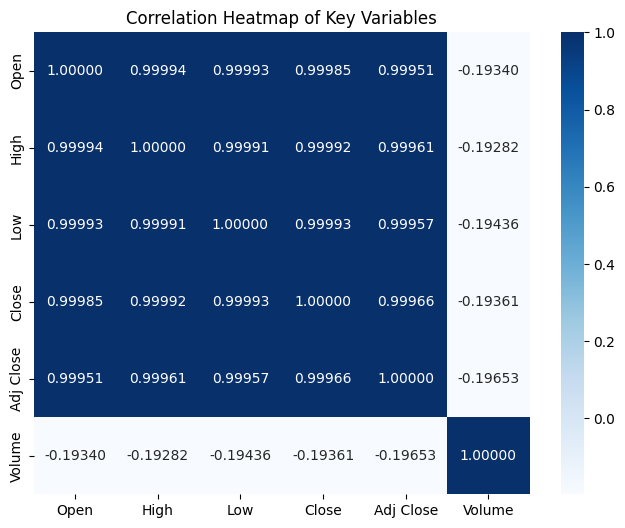

In [8]:
# Select key numerical variables for correlation analysis
cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
corr = df[cols].corr() # Using Pearson correlation matrix

plt.figure(figsize=(8, 6)) 
# Use seaborn for a better heatmap plot
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".5f") # display values to 5 decimal places (differences would be trivial with fewer decimals)
plt.title("Correlation Heatmap of Key Variables")
plt.show()

As seen in the graph, volume has a weak negative correlation with the price variables, suggesting it behaves differently and is unlikely to provide meaningful predictive value for price-based modelling.

### 3.3 Evolution of Apple’s Adjusted Close Price

True to our assumption, the wide range of prices is largely explained by the long historical period covered by the dataset, which includes very early price levels. We focus on the adjusted close price because the close price represents the final consensus of market participants for the trading day, and the adjusted close further removes the effects of corporate actions (such as stock splits and dividends), making it more suitable for consistent long-term analysis.


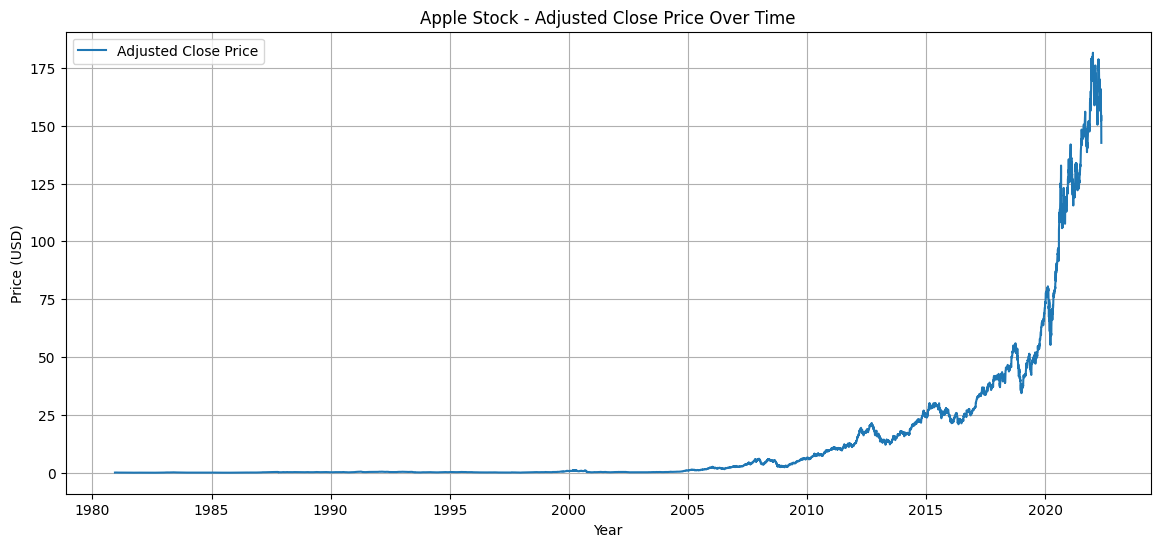

In [9]:
#Plot Adjusted Close Price
plt.figure(figsize=(14,6))
plt.plot(df['Adj Close'], label='Adjusted Close Price')
plt.title("Apple Stock - Adjusted Close Price Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

The Adjusted Close Price plot reveals a strong long-term upward trend in Apple’s market value, accompanied by several clear volatility clusters, especially after 2020. Periods of sharp movement may correspond to major market events, for example the rapid growth in the tech sector following the COVID-19 lockdowns around 2020.


### 3.4 Monthly Distribution of Adjusted Closing Prices

This box plot is used to examine volatility and detect outliers. Plotting daily distributions would be too granular to interpret. We focus on 2005–2018 because prices before 2005 are almost flat and add little insight, while the period after 2018 is highly volatile and made initial model testing unreliable.

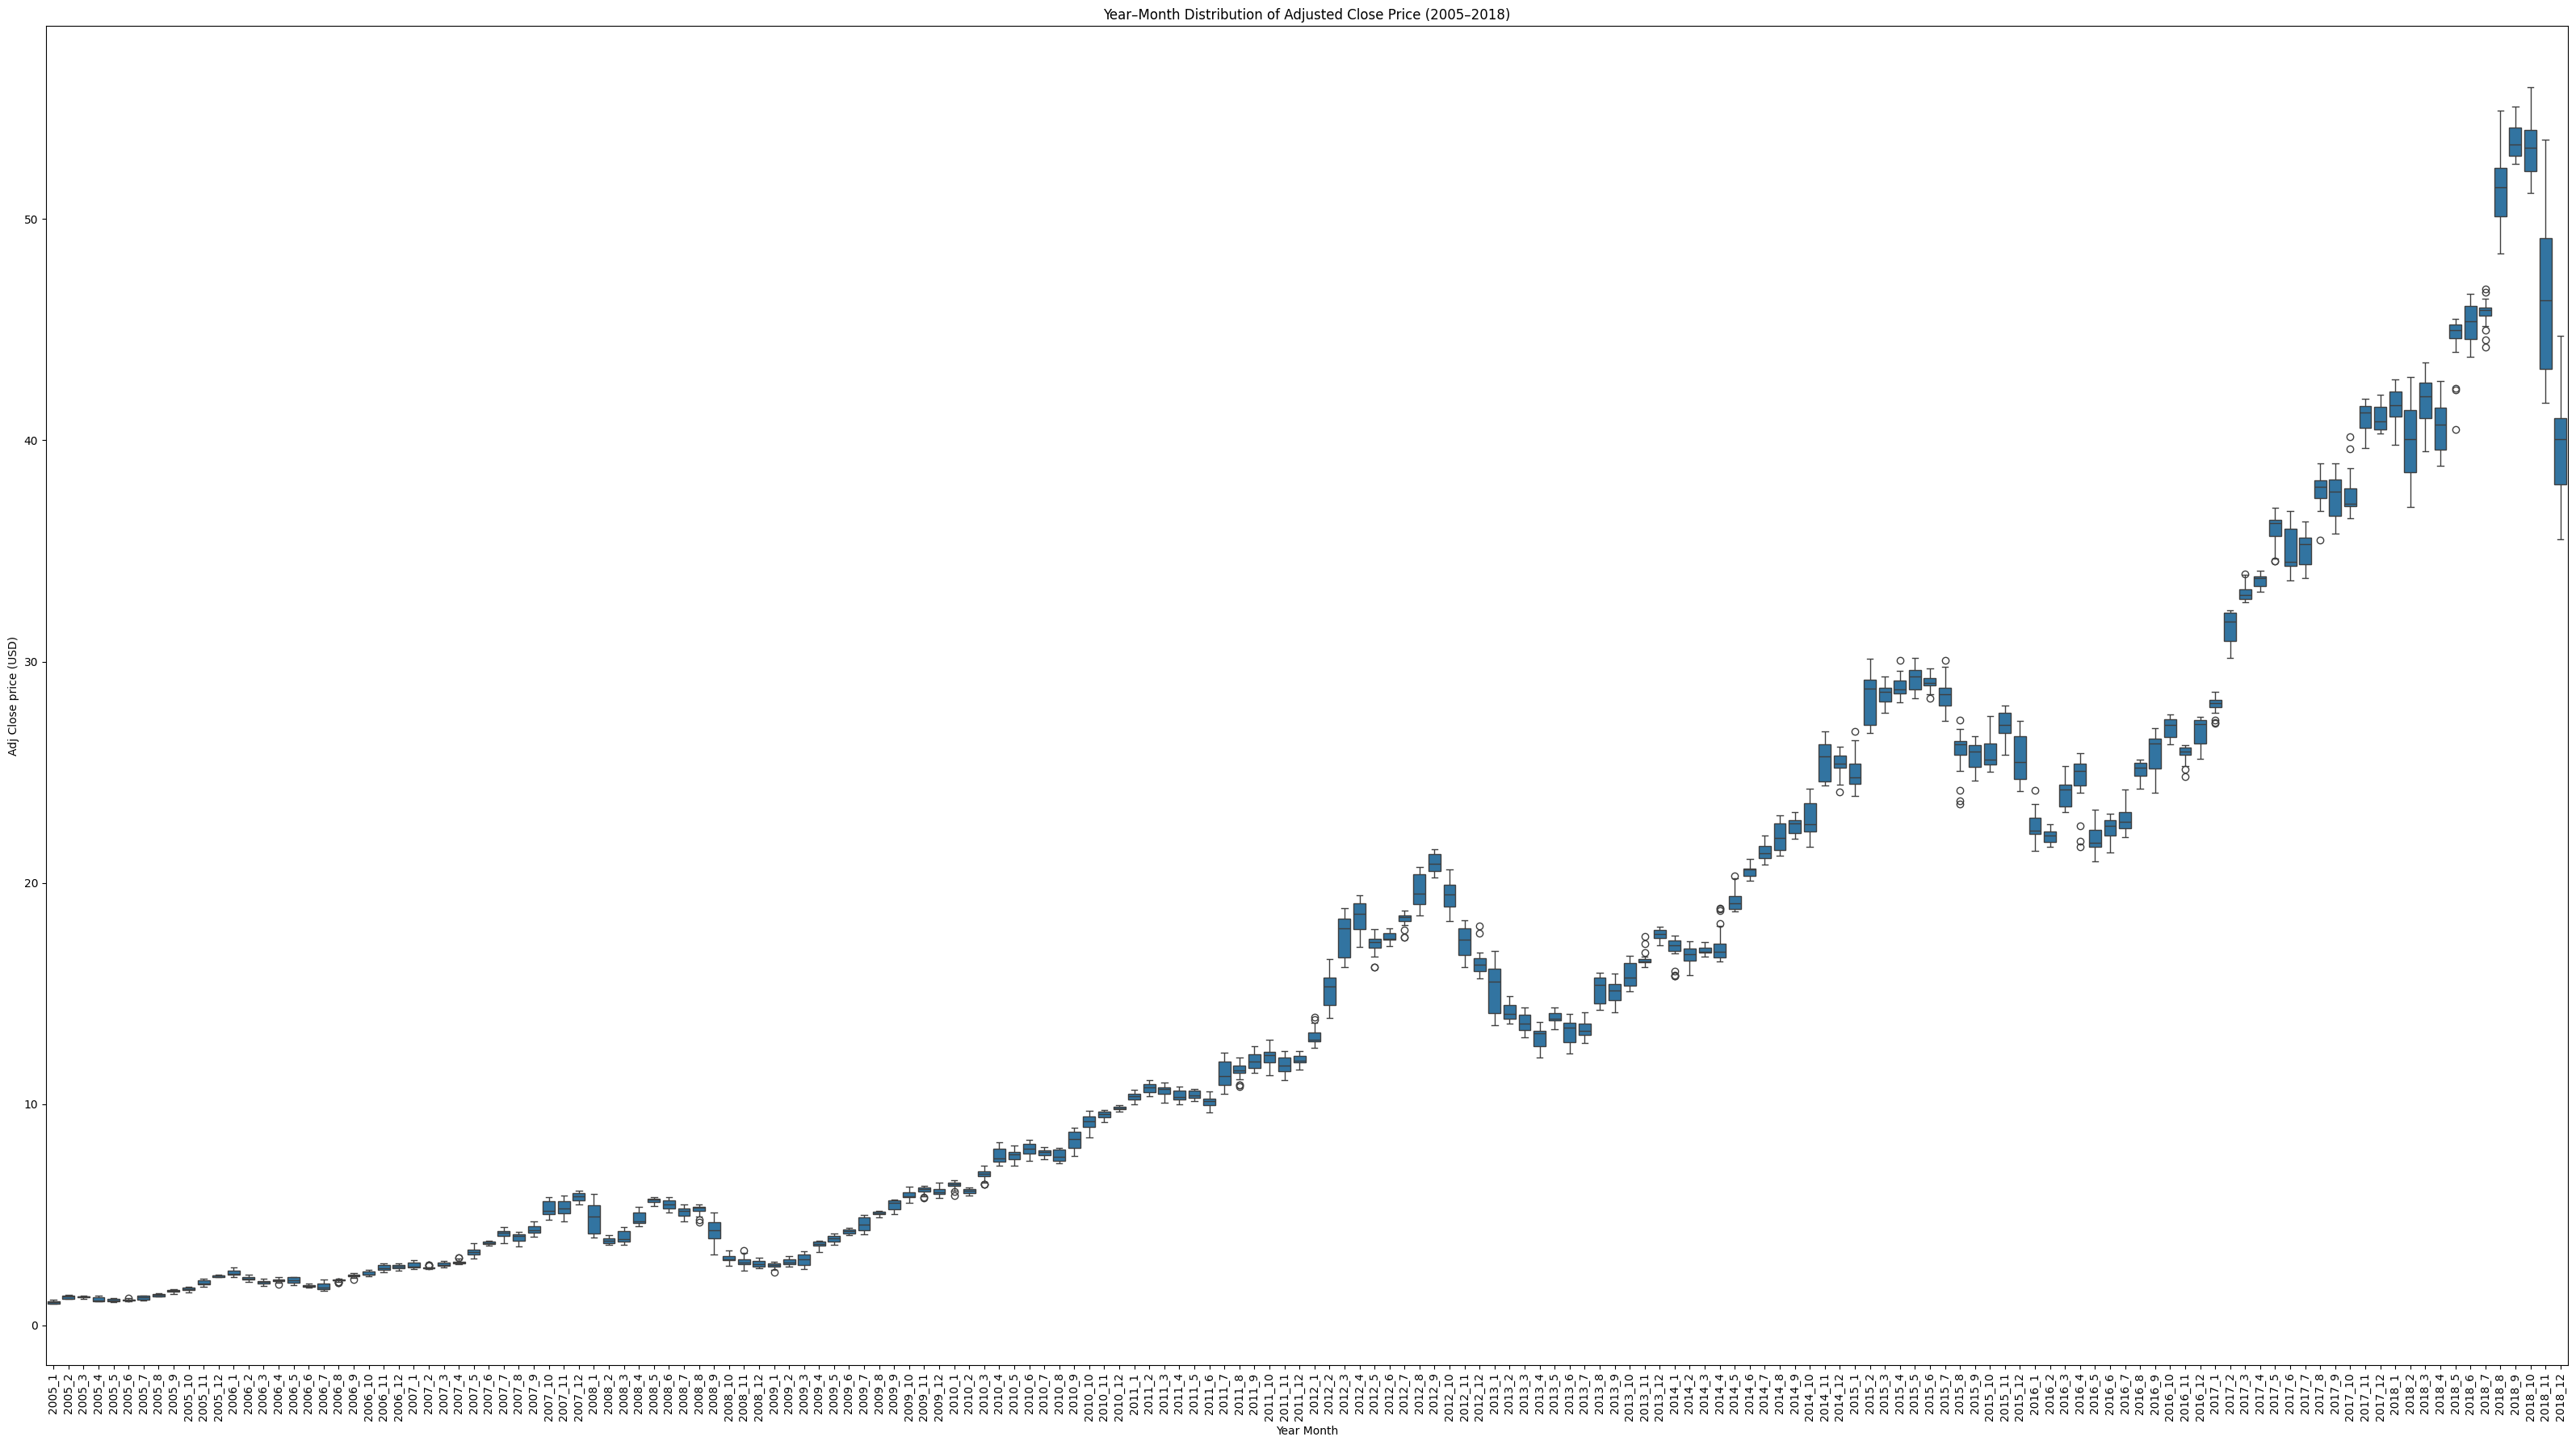

In [10]:
# year-month contribution 
df_new = df.copy()  # avoid modifying original by accident

df_new['year'] = [x for x in df_new.index.year]
df_new['month'] = [x for x in df_new.index.month]
df_new['year_month'] = [str(x.year) + '_' + str(x.month) for x in df_new.index]

# Filter ONLY between 2005 and 2018
mask = df_new[(df_new['year'] >= 2005) & (df_new['year'] <= 2018)]

# Plot
plt.figure(figsize=(32, 18))
plt.title('Year–Month Distribution of Adjusted Close Price (2005–2018)')
sns.boxplot(x='year_month', y='Adj Close', data=mask)
plt.xticks(rotation=90)
plt.xlabel('Year Month')
plt.ylabel('Adj Close price (USD)')
plt.tight_layout()
plt.show()


The chart shows Apple’s long-term upward trend, with monthly closing prices rising from about $1–$2 in 2005 to roughly $40–$45 by late 2018. The widening monthly spread indicates increasing volatility as Apple grows into a large-cap stock. Outliers appear less prominent here because the boxplots aggregate daily movements into monthly distributions.

### 3.5 Moving Average Trend Analysis (2017–2018)

Moving averages help day traders identify potential trends, and the Simple Moving Average (SMA) is often combined with volume indicators to confirm trades and reduce false signals. Day trader can use crossover of lines as signals to make trading decisions. For example, if a short-term SMA is above a long-term one, an uptrend could occur (Hayes 2024). To improve readability and provide a concrete example, we focus on the period 2017–2018 as it aligns with our testing set.

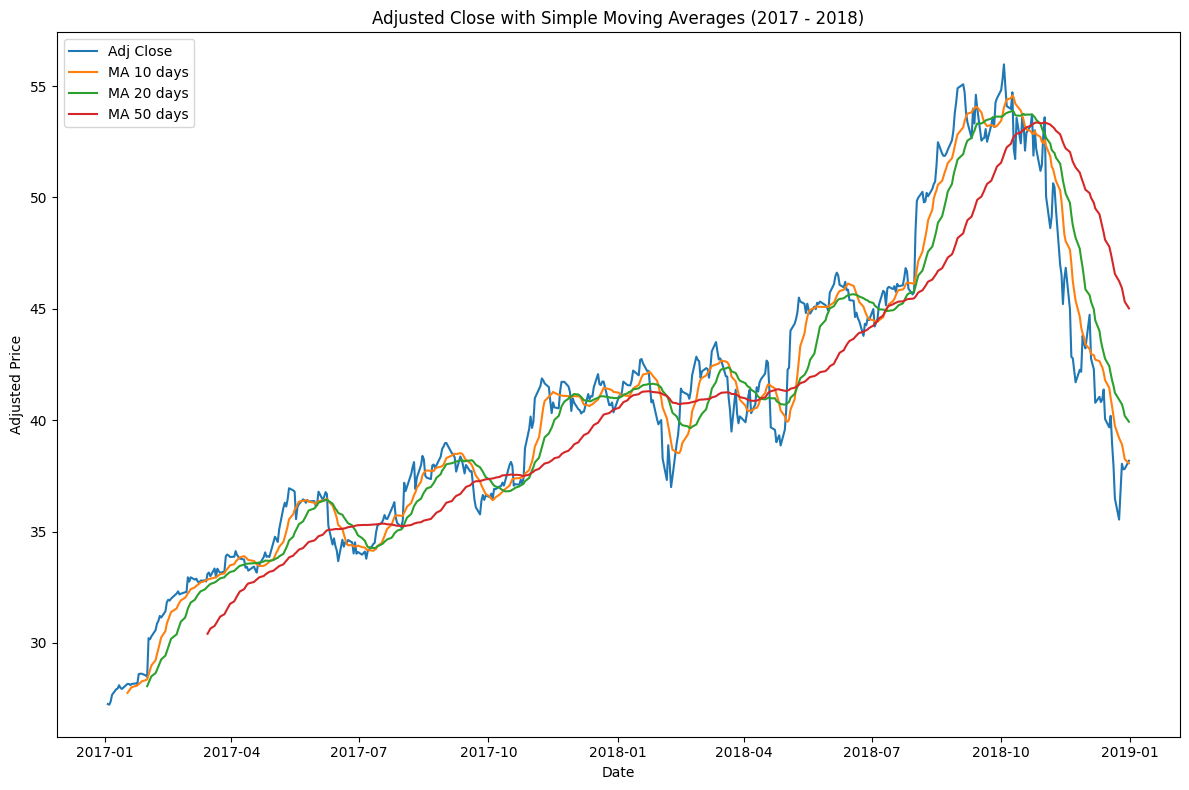

In [12]:
# Filter data to only include observations from 2017 to 2018
mask_post = df[(df.index.year >= 2017) & (df.index.year <= 2018)].copy()

# Calculate Simple Moving Averages (SMA) of the 'Adj Close' price
mask_post['MA10']  = mask_post['Adj Close'].rolling(window=10).mean() # 10-day moving average (short-term trend)
mask_post['MA20']  = mask_post['Adj Close'].rolling(window=20).mean() # 20-day moving average (medium-term trend)
mask_post['MA50']  = mask_post['Adj Close'].rolling(window=50).mean() # 50-day moving average (long-term trend)

# Plot adjusted close price and simple moving averages for 2017–2018
plt.figure(figsize=(12, 8))

plt.plot(mask_post.index, mask_post['Adj Close'], label='Adj Close')
plt.plot(mask_post.index, mask_post['MA10'],  label='MA 10 days')
plt.plot(mask_post.index, mask_post['MA20'],  label='MA 20 days')
plt.plot(mask_post.index, mask_post['MA50'],  label='MA 50 days')

plt.title('Adjusted Close with Simple Moving Averages (2017 - 2018)')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')

plt.legend()
plt.tight_layout()
plt.show()


 The graph indicates a strong upward trend in Apple’s stock through 2017 and early 2018, followed by a clear trend reversal in late 2018, highlighted by short-term SMA crossovers beneath the long-term SMA.

## 4. ARIMA Model

### 4.1 Rationale for Using ARIMA

ARIMA is chosen because stock prices are classic time-series data, and the model is widely regarded as an effective tool for capturing temporal patterns (Overload, 2023). It transforms a non-stationary price series into a stable form through differencing and then uses autoregressive and moving-average components to model how past values influence future movements.

### 4.2 Stationarity and the ADF Test

Because ARIMA requires a stationary series, we first check whether our data satisfies this condition. A time series is stationary if its behaviour is stable over time, without systematic trends or seasonality—a key assumption of ARIMA (Hyndman and Athanasopoulos, 2018). If the series is not stationary, we apply differencing to stabilise it. To formally assess stationarity, we use the Augmented Dickey–Fuller (ADF) test, a standard method for this purpose (Dickey and Fuller, 1979).

### 4.3 Training Set Selection and Initial Preparation 

Based on the findings from the exploratory data analysis, we decided to use 2005–2016 as our training dataset and 2017–2018 as our test set to obtain a more reliable model and a reasonable data allocation for each set. To avoid data leakage and ensure a fair evaluation, stationarity is tested only on the training set rather than on the full dataset.

In [24]:
#using only training period for ADF
train = df.loc['2005':'2016']  # the chosen training set
test  = df.loc['2017':'2018'] # the chosen testing set

result = adfuller(train['Adj Close'])
print('ADF Statistic:', result[0]) # less important than p-value 
print('p-value:', result[1])
if result[1] > 0.05:
    print("The training series is non-stationary. Differencing is needed.")
else:
    print("The training series is stationary.")

ADF Statistic: -0.1821492536645087
p-value: 0.9406161990971197
The training series is non-stationary. Differencing is needed.


The original graph suggests that the series is not stationary, so we apply first-order differencing to transform it into a stationary series before fitting the ARIMA model.

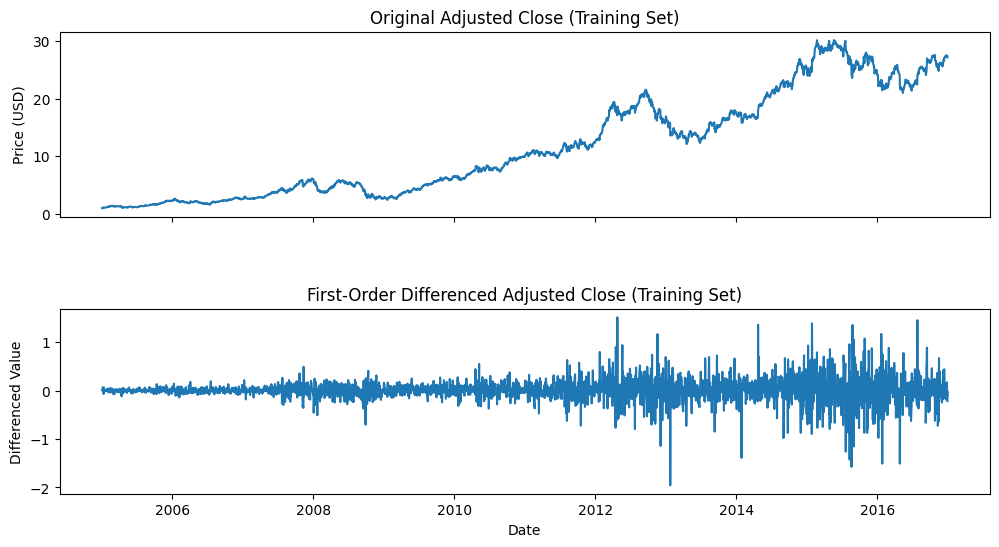

ADF Statistic (Differenced): -11.424656368181326
p-value (Differenced): 6.741433065666912e-21
The differenced training series is stationary.


In [25]:
# First-order differencing on the training set
train_diff = train.copy()
train_diff['Differenced'] = train_diff['Adj Close'].diff()

# Drop missing values resulting from differencing
train_diff.dropna(inplace=True)

# 4. Plot original vs differenced series for better comparison
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

axes[0].plot(train.index, train['Adj Close'])
axes[0].set_title("Original Adjusted Close (Training Set)")
axes[0].set_ylabel("Price (USD)")

axes[1].plot(train_diff.index, train_diff['Differenced'])
axes[1].set_title("First-Order Differenced Adjusted Close (Training Set)")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Differenced Value")

fig.subplots_adjust(hspace=0.5)
plt.show()

# 5. ADF test on the differenced series
result_diff = adfuller(train_diff['Differenced'])
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

if result_diff[1] > 0.05:
    print("The differenced training series is still non-stationary. Further differencing may be needed.")
else:
    print("The differenced training series is stationary.")



 After confirming that the differenced series is stationary, we can proceed with fitting the ARIMA model. The first-order differenced plot suggests that the series is stationary while still retaining some structure, rather than behaving like pure white noise, which indicates that there is serial correlation between data points and that the series can be modelled to make forecasts.

### 4.4 ARIMA Model Fitting

We need to determine the parameters \(p\), \(d\), and \(q\) for ARIMA modelling. We can use `pmdarima.auto_arima()`, which is a useful tool that performs a grid search to find the best possible parameter combination.

In [26]:
import warnings

# Ignore convergence and statistical warnings to keep the output clean for this project
warnings.filterwarnings("ignore")


# p, d, q are the ARIMA parameters:
# - p: order of the autoregressive (AR) part
# - d: degree of differencing
# - q: order of the moving-average (MA) part
# A full theoretical treatment of these parameters is outside the scope of this project,
# so we use auto_arima to choose them automatically.

# Use auto_arima to find a suitable (p, d, q) based on the training data
model = pm.auto_arima(train['Adj Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd' & sanity check 
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# Fit the ARIMA model with the best (p, d, q) order found by auto_arima
model = ARIMA(train['Adj Close'], order=(0, 1, 0), trend='t') # linear trend
model_fit = model.fit()
 
# Forecasting Forecast over the length of the test set
forecast = model_fit.forecast(steps=len(test))


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-158.018, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-157.052, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-157.104, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-155.920, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-155.559, Time=2.90 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.483 seconds


### 4.5 ARIMA Forecast Evaluation

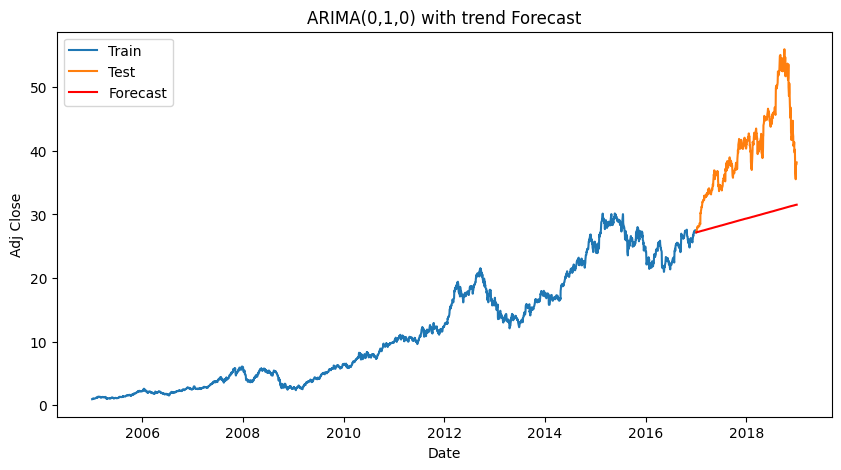

In [27]:
# Plotting the results

plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Adj Close'], label='Train')
plt.plot(test.index, test['Adj Close'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA(0,1,0) with trend Forecast')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

As shown in the graph, the ARIMA model performs reasonably well during periods where the time-series pattern is stable, but it significantly underestimates prices when the market shifts sharply. This is expected because ARIMA assumes a linear structure and relies heavily on past values, making it less suitable for capturing sudden trend changes or highly non-linear price movements.

### 4.6 ARIMA Error Metrics

In [28]:
#MSE & RMSE 

y_true = test['Adj Close']
y_pred = forecast

# --- MAE & MSE & RMSE ---
arima_mae = mean_absolute_error(y_true, y_pred) # MAE: mean absolute error – average absolute difference between predictions and true values
arima_mse = mean_squared_error(y_true, y_pred) # MSE: mean squared error – average of squared errors, penalises large mistakes more
arima_rmse = np.sqrt(arima_mse) # RMSE: root mean squared error – square root of MSE, in the same units as the target variable

print(f"MAE: {arima_mae:.2f}")
print(f"RMSE: {arima_rmse:.2f}")

MAE: 11.19
RMSE: 12.48


These error metrics quantify how far the ARIMA forecasts deviate from the actual test prices and will later be compared with those from other models, with lower values indicating better predictive performance.

## 5. Random Forest Model

### 5.1 Rationale for Using the Random Forest Model

The Random Forest classifier was selected as the second modelling approach in this project to tackle the stock price prediction problem from a classification perspective. Unlike the ARIMA model, which attempts to forecast specific future price values (regression), the Random Forest model was designed to predict the directional movement of the stock. As an ensemble of decision trees, the Random Forest model is a widely used and robust method for time-series prediction tasks, particularly in financial markets (Bou-Hamad et al. 2020).

### 5.2 Feature Engineering and Target Construction

The adjusted closing price was transformed into a daily percentage return, capturing the relative change in price rather than its absolute value, which is more informative for modelling short-term movements. The target variable was then defined as a binary indicator of next-day directional movement, derived from the `pct_change` feature. Because the model uses daily percentage changes, a 0.25% threshold was chosen to filter out very small, likely noise-driven fluctuations.

In [29]:
# Random Forest comparison

# Create a copy with only the adjusted close price
df_rf = df[['Adj Close']].copy()

# Compute daily percentage returns based on adjusted close
# This captures the relative change from one day to the next (today vs. yesterday)
df_rf["pct_change"] = ((df_rf["Adj Close"] - df_rf["Adj Close"].shift(1)) /
                       df_rf["Adj Close"].shift(1)) * 100

# Note:
#   pct_change compares today's adjusted close with yesterday's adjusted close.
#   The target variable, however, is based on the change from today to tomorrow,
#   because we want to predict the future movement given today's information.
#   If tomorrow's percentage move is greater than 0.25%, label = 1 (up), else 0.
threshold = 0.25
df_rf["Target"] = (df_rf["pct_change"].shift(-1) > threshold).astype(int)

# Align Random Forest data with the existing train/test indices
train_rf = df_rf.loc[train.index].copy()
test_rf = df_rf.loc[test.index].copy()

# Drop NaNs created by the shifting operations at the boundaries
train_rf = train_rf.dropna()
test_rf = test_rf.dropna()

train_rf.head() # sanity check 



,Adj Close,pct_change,Target
Date,,,
2005-01-03,0.966323,-1.723635,1
2005-01-04,0.976247,1.026986,1
2005-01-05,0.984798,0.875905,0
2005-01-06,0.985561,0.077478,1
2005-01-07,1.057321,7.281132,0


### 5.3 Random Forest Model Fitting

The model builds multiple decision trees and then combines their outputs, making a final prediction based on the majority vote of the trees.


In [30]:
# Fit the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialise the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees in the forest
    min_samples_split=50,  # minimum samples needed to split a node (helps reduce overfitting)
    random_state=42,       # seed for reproducibility
)

# Define feature column(s); more can be added if new variables are introduced
feature_cols = ["pct_change"]

# Create training feature matrix (X) and target vector (y)
X_train_rf = train_rf[feature_cols]
y_train_rf = train_rf["Target"]

# Create test feature matrix (X) and target vector (y)
X_test_rf = test_rf[feature_cols]
y_test_rf = test_rf["Target"]

# Fit the Random Forest model on the training data
rf_model.fit(X_train_rf, y_train_rf)




,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5.4 Random Forest Forecast Evaluation

In [31]:
# Evaluate Random Forest performance

# Import evaluation metrics
from sklearn.metrics import precision_score, accuracy_score, classification_report

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_rf)

# Compute accuracy, precision, and confusion matrix
accuracy  = accuracy_score(y_test_rf, rf_predictions)
precision = precision_score(y_test_rf, rf_predictions, zero_division=0)

# results
print("Random Forest Accuracy :", accuracy)
print("Random Forest Precision:", precision)
print("\nClassification Report:\n",
      classification_report(y_test_rf, rf_predictions, zero_division=0))


Random Forest Accuracy : 0.5557768924302788
Random Forest Precision: 0.49238578680203043

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.65      0.62       282
           1       0.49      0.44      0.47       220

    accuracy                           0.56       502
   macro avg       0.54      0.54      0.54       502
weighted avg       0.55      0.56      0.55       502



Based on the report, our Random Forest model achieved an accuracy of about 55.6%, only slightly better than random guessing for a binary task. Overall, the model shows limited predictive power, suggesting that daily percentage change alone is not sufficient to reliably forecast next-day stock direction.

## 6. LSTM Model 

### 6.1 Rationale for Using the LSTM Model

The Long Short-Term Memory (LSTM) neural network is chosen in this project because it is specifically designed to overcome a key limitation of many classic time-series approaches, which typically rely on short-term correlations and often assume stationarity. LSTM can capture complex non-linear patterns, making this approach particularly suitable for stock price prediction (Nelson et al. 2017). 

### 6.2 Data Preprocessing

To avoid issues caused by large unscaled values, we apply feature scaling using the MinMaxScaler. This step is essential for LSTM models to converge efficiently.

In [14]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 MB 75.9 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 36.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 31.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 34.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 32.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.8 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25/25 [tensorflow]5 [tensorflow]-py]


In [15]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Use only Adjusted Close
df_lstm = df[['Adj Close']].copy()

# Split into train and test
train_lstm = df_lstm.loc['2005':'2016']
test_lstm  = df_lstm.loc['2017':'2018']

# Feature scaling using MinMaxScaler (fit on train and transform both to avoid data leakage)
sc = MinMaxScaler(feature_range=(0, 1))
train_scaled_lstm = sc.fit_transform(train_lstm)   # training set
test_scaled_lstm  = sc.transform(test_lstm)        # test set


2025-12-03 00:10:27.780692: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The input sequences are made up of past stock prices, while the targets are simply the prices at the following time step. This setup allows the LSTM to capture temporal patterns in the series and use them to generate future price predictions.

In [16]:
# Creating input sequences for LSTM
def create_sequences_lstm(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])  # previous 60 time steps
        y.append(data[i, 0])               # next value
    return np.array(X), np.array(y)

# Create sequences for train and test
X_train_lstm, y_train_lstm = create_sequences_lstm(train_scaled_lstm)
X_test_lstm,  y_test_lstm  = create_sequences_lstm(test_scaled_lstm)

# Reshape inputs for LSTM model: (samples, timesteps, features)
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm  = X_test_lstm.reshape(X_test_lstm.shape[0],  X_test_lstm.shape[1],  1)

### 6.3 Architecture of the LSTM Model

In this section, we define a simple LSTM network with dropout regularization. This architecture is designed to capture temporal dependencies in the historical adjusted close prices while reducing overfitting, enabling the model to learn complex relationships (ShawnYuShuHearn 2023).


In [17]:
# Building the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1))

2025-12-03 00:10:36.570321: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 6.4 Compilation and Training of the LSTM Model

The model is designed to track validation loss throughout training, and the training history is stored for further analysis, such as plotting learning curves.

In [18]:
# Compiling the LSTM model
# 'adam' is a popular optimizer for training deep learning models,
# and 'mean_squared_error' is suitable for regression tasks like stock price prediction.
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the LSTM model and storing the training history
# X_train_lstm, y_train_lstm: training sequences and targets
# X_test_lstm, y_test_lstm: used here as validation data to monitor performance during training
history_lstm = lstm_model.fit(
    X_train_lstm,
    y_train_lstm,
    epochs= 50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm)
)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0258 - val_loss: 0.0059
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0066 - val_loss: 0.0095
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0059 - val_loss: 0.0117
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0046 - val_loss: 0.0085
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0049 - val_loss: 0.0059
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0037 - val_loss: 0.0072
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0039 - val_loss: 0.0057
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0036 - val_loss: 0.0080
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0034 - val_loss: 0.0186
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0

### 6.5 Visualizing Losses over Epochs

The training and validation loss over epochs provide insight into how well the model is learning from the training data and whether there are any signs of overfitting or underfitting.

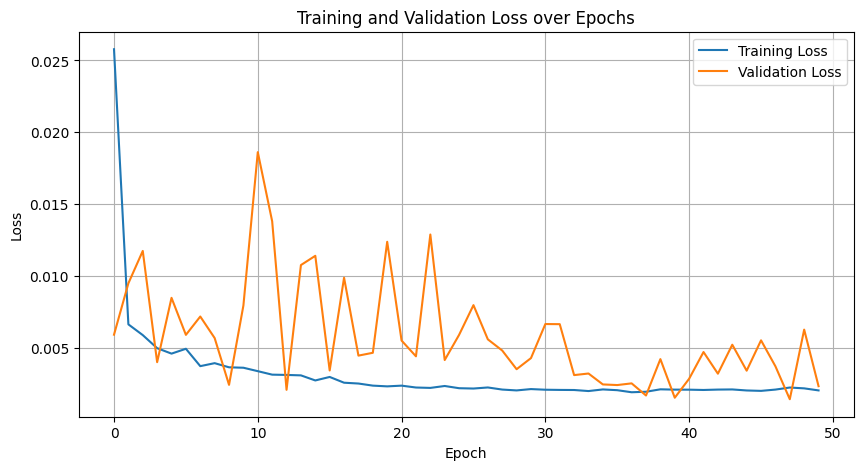

In [19]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Based on the loss curves, the model shows a reasonable fit, with no significant divergence between training and validation loss. Although the validation loss fluctuates due to the noisy nature of stock price data, there is no strong evidence of severe overfitting. Therefore, we can proceed with model prediction. 

### 6.6 Model Prediction and Reverse Scaling

we must reverse the scaling on the predicted stock prices to get the actual stock price values.

In [20]:
# Predict on the test set (scaled)
y_pred_scaled_lstm = lstm_model.predict(X_test_lstm)

# Inverse transform predictions and true values to original price scale
y_pred_lstm = sc.inverse_transform(y_pred_scaled_lstm)
y_test_real_lstm = sc.inverse_transform(y_test_lstm.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


### 6.7 Visualizing the Results 

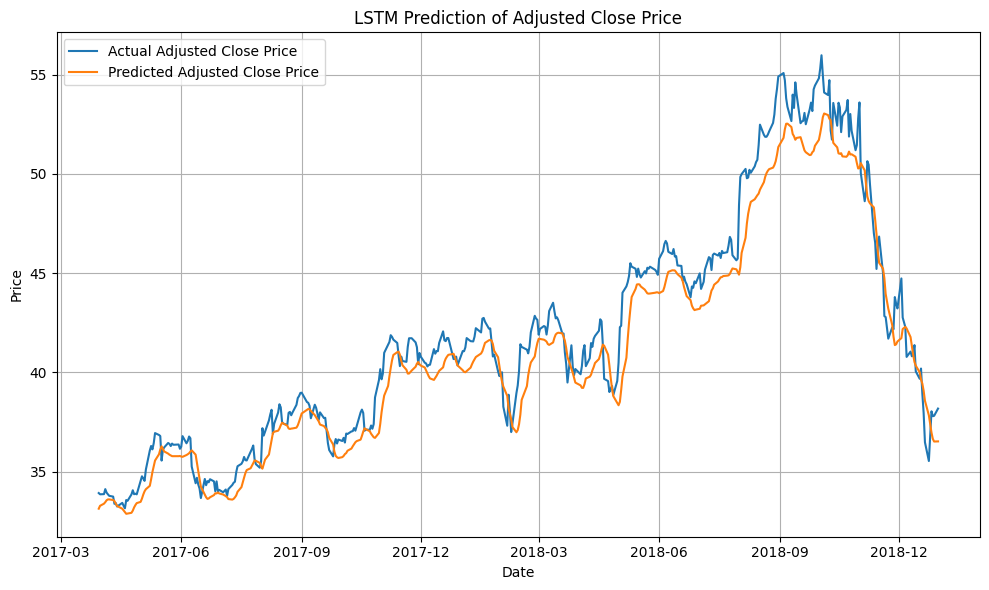

In [21]:
import matplotlib.dates as mdates

#Previously, we used a 60-day window to predict the 61st day. 
seq_length = 60  # skip the first 60 dates so each x-axis date lines up with the correct actual + predicted price.
test_dates = test_lstm.index[seq_length:]   

# Flatten predictions and true values for plotting (to avoid shape mismatches)
real_stock_price = y_test_real_lstm.flatten()
predicted_stock_price = y_pred_lstm.flatten()

plt.figure(figsize=(10, 6))
plt.plot(test_dates, real_stock_price, label='Actual Adjusted Close Price')
plt.plot(test_dates, predicted_stock_price, label='Predicted Adjusted Close Price')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))      # every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))      # <-- YYYY-MM format

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM Prediction of Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the graph, the LSTM model follows the overall movement of the adjusted close price quite well, but it produces a smoother curve that often fails to fully capture sudden or steep fluctuations in the stock price. 

### 6.8 Evaluation Metrics

In [22]:
mae_lstm = mean_absolute_error(y_test_real_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_real_lstm, y_pred_lstm))

print("LSTM MAE :", mae_lstm)
print("LSTM RMSE:", rmse_lstm)

LSTM MAE : 1.1363879458532549
LSTM RMSE: 1.4106169709217264


## 7. Model Comparison and Summary 

### 7.1 Performance Comparison

Since the Random Forest model predicts directional movement rather than price levels and is evaluated using accuracy and precision, we can exclude it from this comparison and instead compare the LSTM and ARIMA using the evaluation metrics MAE and RMSE. MAE and RMSE are widely used to compare regression models because they quantify the average magnitude of prediction errors on the same scale as the target variable, allowing direct comparison of model performance across the same dataset (Hastie et al. 2009). 

In [32]:
metric_comparison = pd.DataFrame(
    {
        "Model": ["ARIMA", "LSTM"],
        "RMSE": [arima_rmse, rmse_lstm],
        "MAE":  [arima_mae,  mae_lstm],
    }
).round(4)

metric_comparison


,Model,RMSE,MAE
0,ARIMA,12.4762,11.1886
1,LSTM,1.4106,1.1364


The LSTM model significantly outperformed the ARIMA model, achieving much lower error values with an RMSE of 2.58 and an MAE of 2.32, compared to ARIMA’s RMSE of 12.48 and MAE of 11.19, indicating a substantially better ability to forecast actual stock prices.

### 7.2 Limitations

Because of the nature and scope of this project, the aim was not to identify the single best-performing model, but rather to explore common machine learning approaches used in stock price prediction. The performance of these models could be improved further using more advanced techniques. In future work, Random Forest could be compared with another model that also focuses on directional movement. Additional EDA visualisations and deeper analysis could also be incorporated to enrich the project. 

### 7.3 Summary 

This study applied three forecasting approaches—ARIMA, Random Forest, and LSTM—to Apple stock price data and specially adjusted close price. Across all models, Random Forest is used to predict directional movements, although the performance is very limited with 55.6% accuracy. LSTM showed strong results, successfully capturing short-term upward and downward trends despite being trained on price levels compared to ARIMA which struggles with the accurate prediction, potential due to its limitations in modelling the non-linear dynamics of stock price movements.


## 8. References

Hayes, Adam. 2024. “Simple Moving Average - SMA.” Investopedia. 2024. https://www.investopedia.com/terms/s/sma.asp. 

Fischer, Thomas, and Christopher Krauss. 2018. “Deep Learning with Long Short-Term Memory Networks for Financial Market Predictions.” European Journal of Operational Research 270 (2): 654–669.
https://doi.org/10.1016/j.ejor.2017.11.054.

Makridakis, Spyros, Evangelos Spiliotis, and Vassilios Assimakopoulos. 2018. “Statistical and Machine Learning Forecasting Methods: Concerns and Ways Forward.” PLOS ONE 13 (3): e0194889.
https://doi.org/10.1371/journal.pone.0194889.

Overload, Data. "Understanding ARIMA Models: A Comprehensive Guide to Time Series Forecasting." Medium, June 17, 2023. https://medium.com/@data-overload/understanding-arima-models-a-comprehensive-guide-to-time-series-forecasting-dfc7207f2406.

Alien. "🍏🍎 Apple Stock Price - All Time📈💹." Kaggle, 2022. https://www.kaggle.com/datasets/alanjo/apple-stock-price-all-time?resource=download.

Hyndman, Rob J., and George Athanasopoulos. Forecasting: Principles and Practice. 2nd ed. Melbourne, Australia: OTexts, 2018. https://otexts.com/fpp2/.

Dickey, David A., and Wayne A. Fuller. "Distribution of the Estimators for Autoregressive Time Series with a Unit Root." Journal of the American Statistical Association 74, no. 366 (1979): 427–431.

Bou-Hamad, Imad, George Michailidis, and Olivier Scaillet. 2020. “Forecasting Financial Time-Series Using Data Mining Models: A Simulation Study.” Research in International Business and Finance 51: 101072.

Nelson, David M. Q., Adriano C. M. Pereira, and Renato A. de Oliveira. 2017. “Stock Market’s Price Movement Prediction with LSTM Neural Networks.” In Proceedings of the 2017 International Joint Conference on Neural Networks (IJCNN), 1419–1426. Piscataway, NJ: IEEE. https://doi.org/10.1109/IJCNN.2017.7966019.

ShawnYuShuHearn. 2023. “Forecasting Stock Market Indices Prices with LSTM: A Deep Learning Approach to Predicting Market Trends.” Medium. Accessed December 2, 2025. https://medium.com/@yushuhearn/stock-price-prediction-using-lstm-a-step-by-step-guide-for-spy-2c1609b95741.

Hastie, Trevor, Robert Tibshirani, and Jerome Friedman. 2009. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. 2nd ed. New York: Springer.

OpenAI. 2025. “ChatGPT.” ChatGPT. 2025. https://chat.openai.com/chat.






## 9. Appendix 

### 9.1 Project Management 

### Overview  
Our team followed an Agile-inspired workflow for the *Prediction of Apple Stock Prices* project, using collaborative tools for task tracking, version control, and ongoing communication. Work was divided according to each member’s strengths across EDA, modelling, analysis, and report writing.

### Workflow & Communication  

- **Task Allocation**  
  - Tasks were assigned based on individual skills and interests (coding, analysis, writing).  
  - Jack and Tianqi acted as co-coordinators, managing timelines and dependencies (e.g. completing EDA before model training).

- **Progress Tracking**  
  - Weekly check-ins were held to review progress, discuss blockers, and realign priorities.  
  - Vedant served as the main contact with the Teaching Assistant (TA), especially to confirm our LSTM methodology matched course expectations.

- **Version Control & Collaboration**  
  - A shared environment (DeepFlow/GitHub) was used for code integration across EDA, ARIMA, Random Forest, and LSTM components.  
  - Regular merges ensured everyone worked from a consistent and up-to-date codebase.

### Quality Assurance & Review  

- **Peer Review**  
  - Each report section underwent peer review to ensure clarity and technical correctness.  
  - For example, Vincent’s Random Forest write-up was reviewed by Jack, who implemented the model.

- **Integration & Final Assembly**  
  - Jack compiled the separate notebooks and markdown files into a single cohesive report, aligning tone, formatting, and structure.

- **Project Management Records**  
  - Vincent maintained project documentation, milestones, and checks against assessment criteria.

### Team Roles & Contributions  

| Team Member | Roles & Contributions |
|------------|------------------------|
| **Jack (Team Lead)** | Project coordination (timelines, tasks), initial EDA, ARIMA and Random Forest implementation, visual analysis explanations, final report integration and submission review. |
| **Tianqi** | ARIMA results analysis and interpretation, visual analysis write-ups, full draft peer review to ensure narrative flow. |
| **Vincent** | Random Forest analysis and interpretation, model performance visual explanations, project management documentation and this section. |
| **Vedant** | Co-development of the LSTM model, co-authoring LSTM analysis and evaluation, primary TA contact for model validation and requirements clarification. |
| **Vidhi** | Co-development of the LSTM model, co-authoring LSTM analysis and performance evaluation. |


### 9.2 AI usage

**Use of Generative AI in the Project:**

- Assist with code generation and explanation  
- Perform readability checks and proofreading  
- Improve the clarity and structure of the EDA, model training, and evaluation  
- Help produce professional-level commentary and conclusions  
- Assist with the model comparison methodology  

Importantly, AI was used to support analytical reasoning, not to replace independent work.  
All final decisions were made by the students and justified based on data-driven evidence.

AI assistance for this project was provided using ChatGPT. An example of this usage can be accessed via the following link:
https://chatgpt.com/share/692de83d-30b0-8008-bbdb-fa1e416220a6